In [16]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x, end=" ")

apple banana cherry 

## Download the data provided by Bing, store it in Bing-covid19_data.csv

In [273]:
!curl https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv -o DataFiles/Bing-covid19_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 72.8M    0 10968    0     0   6671      0  3:10:57  0:00:01  3:10:56  6671
  5 72.8M    5 4075k    0     0  1703k      0  0:00:43  0:00:02  0:00:41 1703k
 16 72.8M   16 12.1M    0     0  3679k      0  0:00:20  0:00:03  0:00:17 3678k
 27 72.8M   27 20.1M    0     0  4709k      0  0:00:15  0:00:04  0:00:11 4709k
 37 72.8M   37 27.5M    0     0  5237k      0  0:00:14  0:00:05  0:00:09 6871k
 47 72.8M   47 34.4M    0     0  5524k      0  0:00:13  0:00:06  0:00:07 7434k
 54 72.8M   54 40.0M    0     0  5549k      0  0:00:13  0:00:07  0:00:06 7390k
 63 72.8M   63 46.6M    0     0  5687k      0  0:00:13  0:00:08  0:00:05 7048k
 70 72.8M   70 51.7M    0     0  5638k      0  0:00

## Read data from Bing-covid19_data.csv and split the data in 3 files to easier analisys. the files are Worldwide_raw_data.csv,  Argentina_raw_data.csv and Usa_raw_data.csv

In [274]:
#open main file with raw data.
data_file = open("DataFiles/Bing-covid19_data.csv", encoding="utf8")
data_file
#open file to store the 'Worldwide' data
worldwide_file = open("DataFiles/Worldwide_raw_data.csv", 'w')
#open file to store the 'Argentina' data
argentina_file = open("DataFiles/Argentina_raw_data.csv", 'w')
#open file to store the 'USA' data
usa_file = open("DataFiles/Usa_raw_data.csv", 'w')

raw_data = data_file.readline()
raw_data_list = []
raw_data_list = raw_data.split(",")

index_country = 12 #index that has the country name
index_state = 13 #index that has the state name
while raw_data:
    raw_data_list = raw_data.split(",")
    if raw_data_list[0] == "\n":
        pass
    elif raw_data_list[index_country] == "Worldwide":
        worldwide_file.write(raw_data)
    elif raw_data_list[index_country] == "Argentina":
        argentina_file.write(raw_data)
    elif raw_data_list[index_country] == "United States":
        usa_file.write(raw_data)
    raw_data = data_file.readline()

print('DONE')
data_file.close()
worldwide_file.close()
argentina_file.close()
usa_file.close()

DONE


## Extract the data at a country level only

In [275]:
data_file = open("DataFiles/Bing-covid19_data.csv", encoding="utf8")
#Countries data only
countries_file = open("DataFiles/Countries_raw_data.csv", "w")

raw_data = data_file.readline()
raw_data_list = []
raw_data_list = raw_data.split(",")
countries_file.write(raw_data) #get the first row in

index_country = 12 #index that has the country name
index_state = 13 #index that has the state name
while raw_data:
    if raw_data_list[0] == "\n":
        pass
    elif raw_data_list[index_state] == "":
        countries_file.write(raw_data)
    raw_data = data_file.readline()
    raw_data_list = raw_data.split(",")


data_file.close()   
countries_file.close()

## Store the raw data from Chaco. Only include the columns that are useful.

In [276]:
'''Store the Chaco data in its own file.
Only include this information: Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange
Updated: [1], Confirmed: [2], ConfirmedChange: [3], Deaths: [4], DeathsChange: [5], Recovered: [6], RecoveredChange: [7], 
Country_Region: [12], AdminRegion1(state/province): [13], AdminRegion2 (county): [14]
'''
#open file to store the 'Argentina' data
argentina_file = open("DataFiles/Argentina_raw_data.csv", 'r')
#open file to store the 'USA' data
chaco_file = open("DataFiles/chaco_raw_data.csv", 'w')

chaco_file.write('Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange\n')
argentina_data = argentina_file.readline()
chaco_data_list = []
chaco_data_list = argentina_data.split(",")
index_state = 13 #index that has the state name
while argentina_data:
    if chaco_data_list[0] == "\n":
        pass
    elif chaco_data_list[index_state] == "Chaco":
        chaco_file.write(chaco_data_list[1]+','+chaco_data_list[2]+','+chaco_data_list[3]+','+chaco_data_list[4]+','+chaco_data_list[5]+'\n')
    argentina_data = argentina_file.readline()
    chaco_data_list = argentina_data.split(",")

print('DONE generating Chaco data')
argentina_file.close()
chaco_file.close()

DONE generating Chaco data


## Store the raw data for Argentina as country. Only include the columns that are useful.

In [277]:
#open file to store the 'Argentina' data
argentina_file = open("DataFiles/Argentina_raw_data.csv", 'r')
#open file to store the 'ArgCountry' data
ArgCountry_file = open("DataFiles/ArgCountry_raw_data.csv", 'w')

ArgCountry_file.write('Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange\n')
argentina_data = argentina_file.readline()
ArgCountry_data_list = []
ArgCountry_data_list = argentina_data.split(",")
index_state = 13 #index that has the state name
while argentina_data:
    if ArgCountry_data_list[0] == "\n":
        pass
    elif ArgCountry_data_list[index_state] == "":
        ArgCountry_file.write(ArgCountry_data_list[1]+','+ArgCountry_data_list[2]+','+ArgCountry_data_list[3]+','+ArgCountry_data_list[4]+','+ArgCountry_data_list[5]+','+ArgCountry_data_list[6]+','+ArgCountry_data_list[7]+'\n')
    argentina_data = argentina_file.readline()
    ArgCountry_data_list = argentina_data.split(",")

print('DONE generating ArgCountry data')
argentina_file.close()
ArgCountry_file.close()

DONE generating ArgCountry data


In [278]:
'''Calculate the death percentage per day and add it to a new file.
New file name chaco_cal_data.csv
Columns: Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,DeathsPer
DeathPer = (Deaths/Confirmed)*100
per_state_death = (int(arg_data_state_latest[4])/int(arg_data_state_latest[2]))*100
'''
#open file to store the 'USA' data
chaco_file = open("DataFiles/chaco_raw_data.csv", 'r')
chaco_cal_file = open("DataFiles/chaco_cal_data.csv", 'w')

chaco_data = chaco_file.readline()
#print(chaco_data)
chaco_data_list = []
chaco_data_list = chaco_data.split(",")
#print(chaco_data_list)
#chaco_data_list.append('DeathPer')
chaco_cal_file.write('Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,DeathsPer\n')


while chaco_data:
    chaco_data = chaco_file.readline()
    chaco_data_list = chaco_data.split(",")
    if chaco_data_list[0] != "":
        per_state_death = (int(chaco_data_list[3])/int(chaco_data_list[1]))*100
        temp = chaco_data_list[4] #remove the \n from last index
        temp = temp[:-1] #remove the \n from last index
        chaco_data_list[4] = temp #remove the \n from last index
        chaco_cal_file.write(chaco_data_list[0] + ',' + chaco_data_list[1] + ',' + chaco_data_list[2] + ',' + chaco_data_list[3] + ',' + chaco_data_list[4] + ',' + str(round(per_state_death, 2)) + '\n')
    else:
        pass


print('DONE')
chaco_file.close()
chaco_cal_file.close()

DONE


In [279]:
'''Calculate the death percentage and recovery per day, and add it to a new file.
New file name Countries_cal_data.csv
Columns: Updated,Confirmed,ConfirmedChange,RecoveredPer,Deaths,DeathsChange,DeathsPer
DeathsPer = (Deaths/Confirmed)*100
RecoveredPer = (Recovered/Confirmed)*100
'''
#open file to store the 'Countries' data
countries_file = open("DataFiles/Countries_raw_data.csv", 'r')
countries_cal_file = open("DataFiles/Countries_cal_data.csv", 'w')

countries_data = countries_file.readline()
countries_data_list = []
countries_data_list = countries_data.split(",")

countries_cal_file.write('Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,DeathsPer,Recovered,RecoveredChange,RecoveredPer,Country\n')
per_country_death = 0
per_country_recovered = 0

while countries_data:
    countries_data = countries_file.readline()
    countries_data_list = countries_data.split(",")
    if countries_data_list[0] != "":
        if (countries_data_list[2] == '0') or (countries_data_list[2] == ''): #track data that is invalid
            per_country_death = 0
            per_country_recovered = 0
        elif (countries_data_list[6] == ''):
            countries_data_list[6] = '0'
        else:
            per_country_death = (int(countries_data_list[4])/int(countries_data_list[2]))*100 #percentage of death on each row
            per_country_recovered = (int(countries_data_list[6])/int(countries_data_list[2]))*100 #percentage of death on each row
        #temp = chaco_data_list[4] #remove the \n from last index
        #temp = temp[:-1] #remove the \n from last index
        #chaco_data_list[4] = temp #remove the \n from last index
        countries_cal_file.write(countries_data_list[1] + ',' + countries_data_list[2] + ',' + countries_data_list[3] + ',' + countries_data_list[4] + ',' + countries_data_list[5] + ',' + str(round(per_country_death, 2)) + ',' + countries_data_list[6] + ',' + countries_data_list[7] + ',' + str(round(per_country_recovered, 2)) + ',' + countries_data_list[12] + '\n')
    else:
        pass


print('DONE calculating countries data.')
countries_file.close()
countries_cal_file.close()

DONE calculating countries data.


In [280]:
'''Calculate the death percentage per day and add it to a new file.
New file name ArgCountry_cal_data.csv
Columns: Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,DeathsPer
DeathPer = (Deaths/Confirmed)*100
per_state_death = (int(arg_data_state_latest[4])/int(arg_data_state_latest[2]))*100
'''
#open file to store the 'USA' data
ArgCountry_file = open("DataFiles/ArgCountry_raw_data.csv", 'r')
ArgCountry_cal_file = open("DataFiles/ArgCountry_cal_data.csv", 'w')

ArgCountry_data = ArgCountry_file.readline()
#print(ArgCountry_data)
ArgCountry_data_list = []
ArgCountry_data_list = ArgCountry_data.split(",")
#print(ArgCountry_data_list)
#ArgCountry_data_list.append('DeathPer')
ArgCountry_cal_file.write('Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,DeathsPer,Recovered,RecoveredChange\n')


while ArgCountry_data:
    ArgCountry_data = ArgCountry_file.readline()
    ArgCountry_data_list = ArgCountry_data.split(",")
    if ArgCountry_data_list[0] != "":
        per_state_death = (int(ArgCountry_data_list[3])/int(ArgCountry_data_list[1]))*100
        temp = ArgCountry_data_list[6] #remove the \n from last index
        temp = temp[:-1] #remove the \n from last index
        ArgCountry_data_list[6] = temp #remove the \n from last index
        ArgCountry_cal_file.write(ArgCountry_data_list[0] + ',' + ArgCountry_data_list[1] + ',' + ArgCountry_data_list[2] + ',' + ArgCountry_data_list[3] + ',' + ArgCountry_data_list[4] + ',' + str(round(per_state_death, 2)) + ',' + ArgCountry_data_list[5] + ',' + ArgCountry_data_list[6] + '\n')
    else:
        pass


print('DONE')
ArgCountry_file.close()
ArgCountry_cal_file.close()

DONE


In [281]:
%matplotlib widget

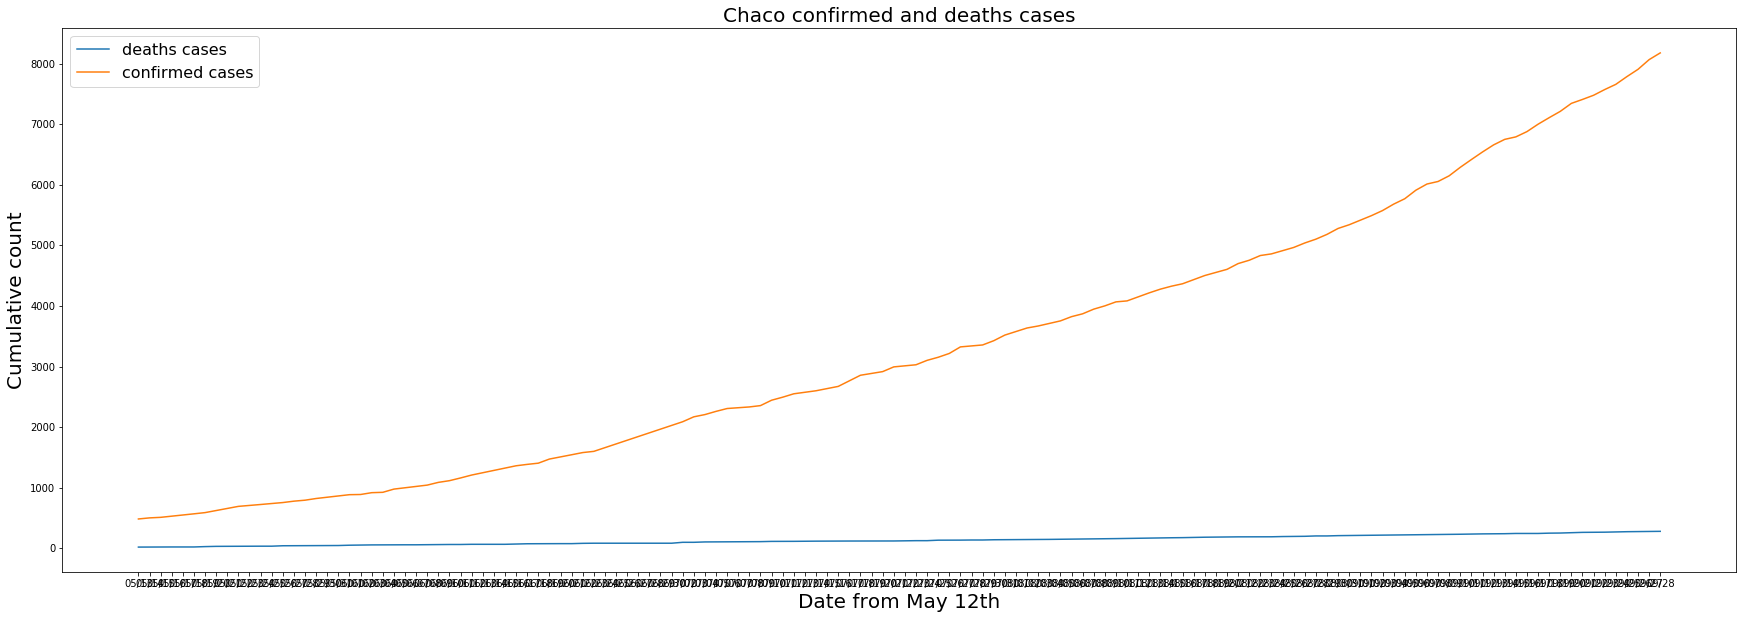

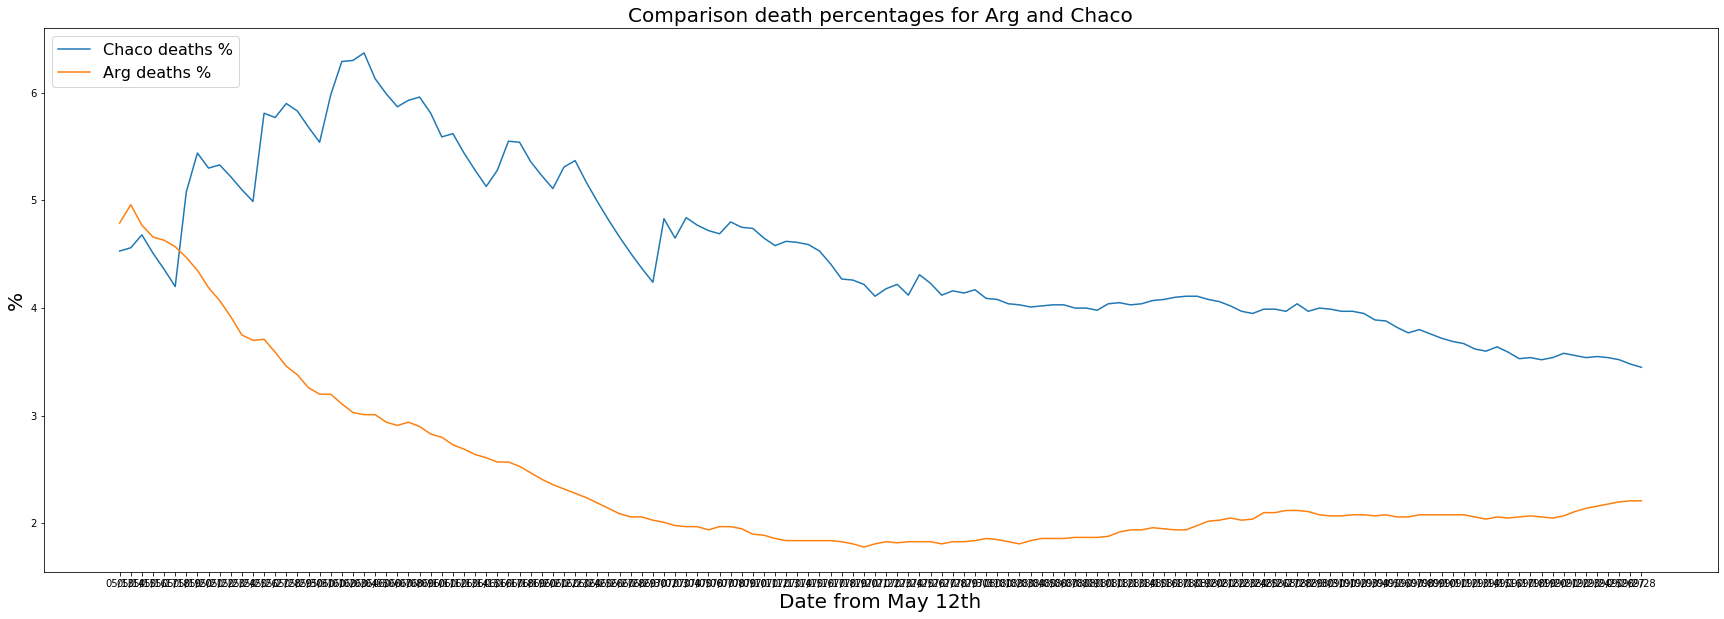

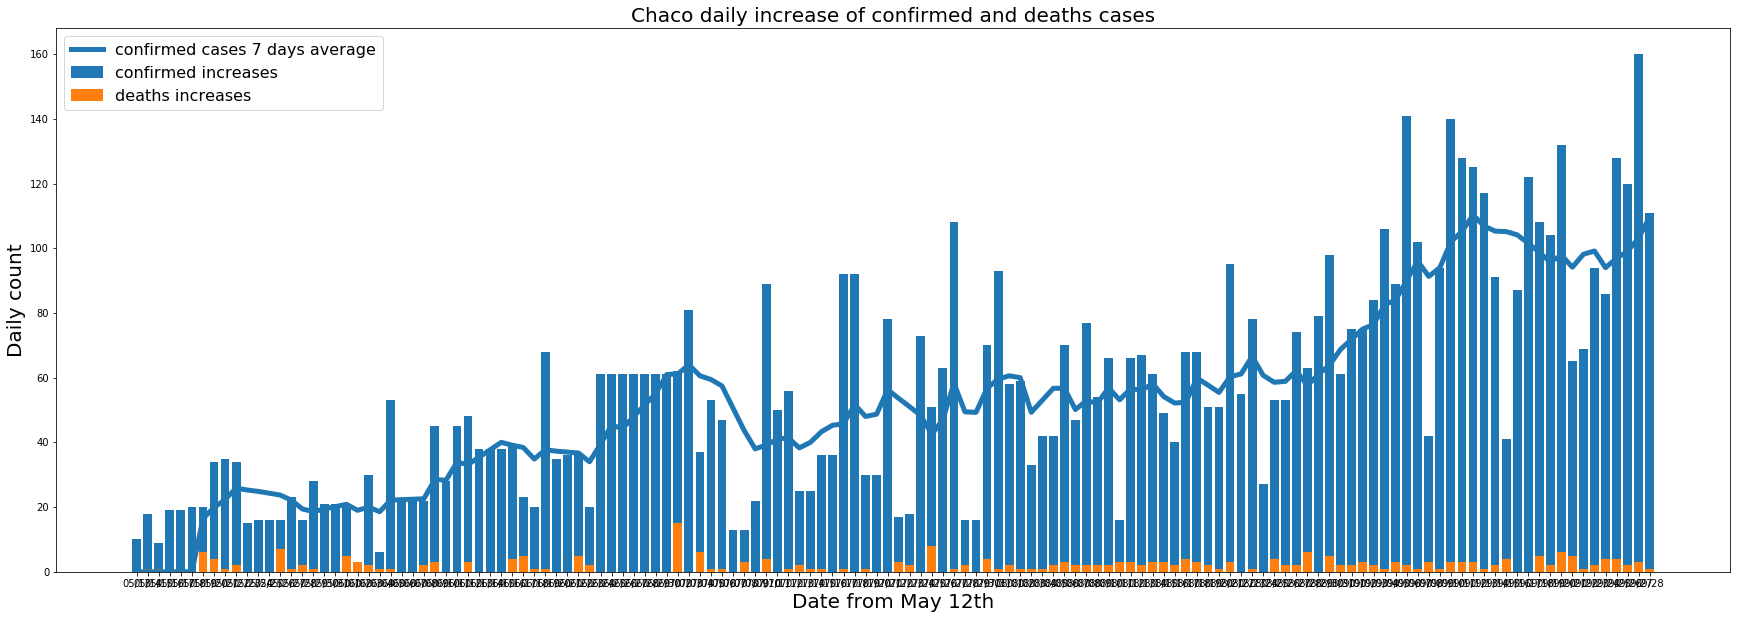

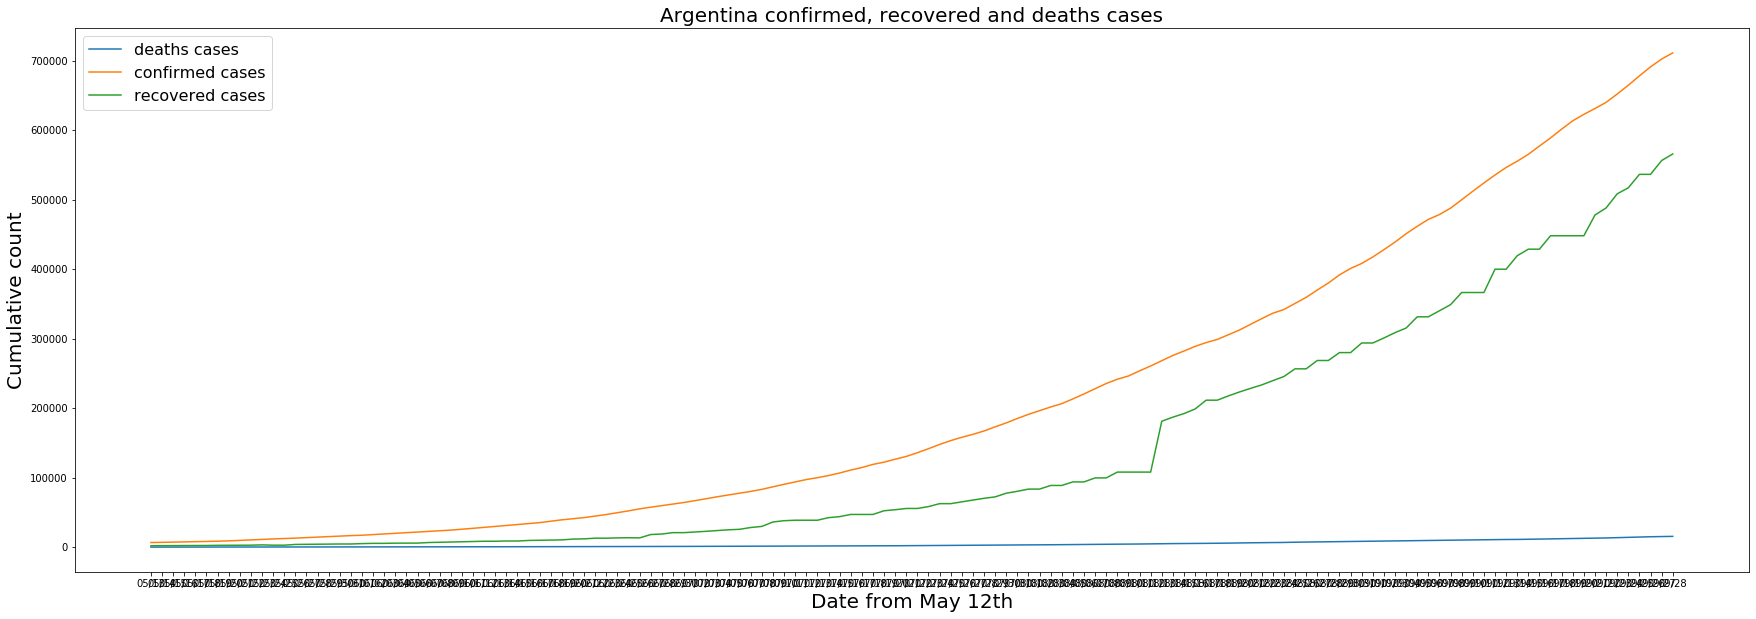

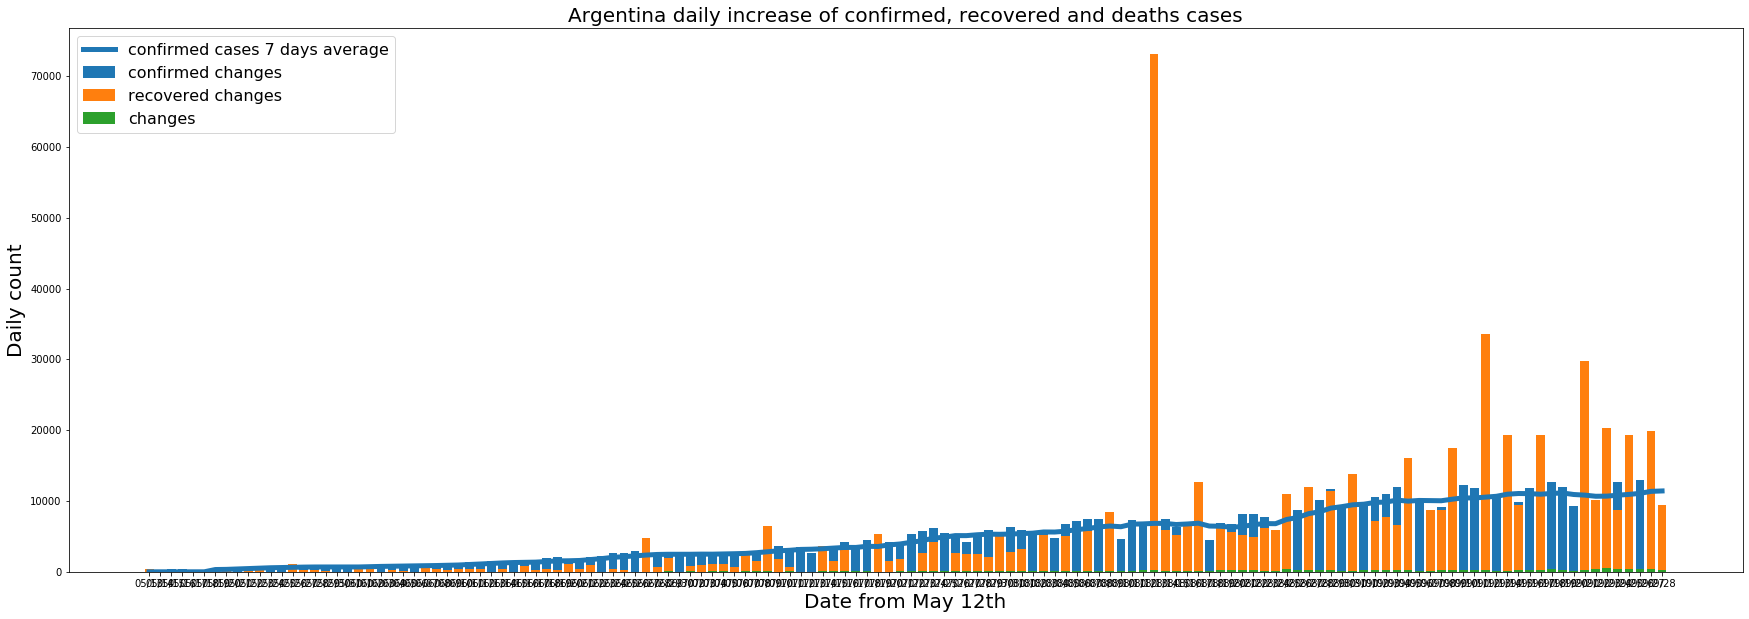

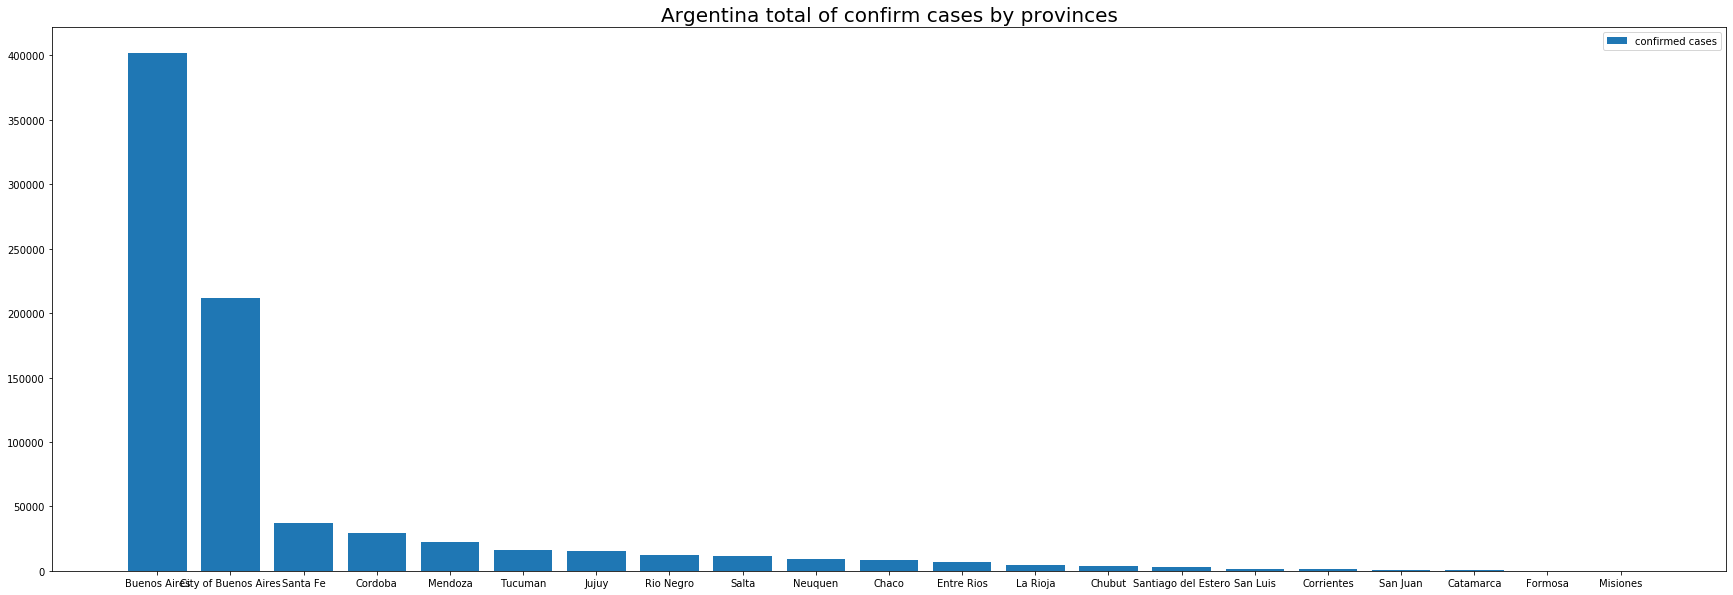

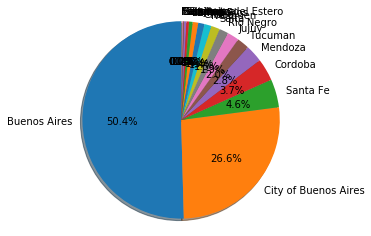

In [282]:
'''Write a program to graph the data from chaco_cal_data.csv
    Put all the columns in its own list, then can write multiple graphs per dates (Updated values)'''
import matplotlib.pyplot as plt
import itertools
import warnings
#to export to pdf
from matplotlib.backends.backend_pdf import PdfPages

#%matplotlib notebook
%matplotlib inline

chaco_cal_file = open("DataFiles/chaco_cal_data.csv", 'r')
ArgCountry_cal_file = open("DataFiles/ArgCountry_cal_data.csv",'r')
Arg_raw_file = open("DataFiles/Argentina_raw_data.csv",'r')

chaco_data = chaco_cal_file.readline()
ArgCountry_cal_data = ArgCountry_cal_file.readline()
date_start = '05/12/2020' #this is the date we will use to start writing the graphs.
#read each line until we find the date_start variable
while chaco_data:
    chaco_data = chaco_cal_file.readline()
    if date_start in chaco_data:
        break
    else:
        pass

while ArgCountry_cal_data:
    ArgCountry_cal_data = ArgCountry_cal_file.readline()
    if date_start in ArgCountry_cal_data:
        break
    else:
        pass


chaco_data_list = chaco_data.split(',')
ArgCountry_data_list = ArgCountry_cal_data.split(',')


updated = [] #use the dates from chaco_cal_data.csv
chaco_confirmed = []
chaco_confirmedChange = []
chaco_deaths = []
chaco_deathsChange = []
chaco_deathsPer = []

ArgCountry_confirmed = []
ArgCountry_confirmedChange = []
ArgCountry_deaths = []
ArgCountry_deathsChange = []
ArgCountry_deathsPer = []
ArgCountry_recovered = []
ArgCountry_recoveredChange = []

#add the chaco data in different lists to use then in the graphs 
while chaco_data:
    chaco_data = chaco_cal_file.readline()
    chaco_data_list = chaco_data.split(',')
    ArgCountry_cal_data = ArgCountry_cal_file.readline()
    ArgCountry_data_list = ArgCountry_cal_data.split(',')
    if chaco_data_list[0] != '':
        temp = chaco_data_list[0] #remove the year
        temp = temp[:-5] #remove the year
        updated.append(temp)
        chaco_confirmed.append(int(chaco_data_list[1]))
        chaco_confirmedChange.append(int(chaco_data_list[2]))
        chaco_deaths.append(int(chaco_data_list[3]))
        chaco_deathsChange.append(int(chaco_data_list[4]))
        chaco_deathsPer.append(float(chaco_data_list[5]))
        #including ArgCountry data in this loop to have the lists with the same number of entries.
        ArgCountry_confirmed.append(int(ArgCountry_data_list[1]))
        ArgCountry_confirmedChange.append(int(ArgCountry_data_list[2]))
        ArgCountry_deaths.append(int(ArgCountry_data_list[3]))
        ArgCountry_deathsChange.append(int(ArgCountry_data_list[4]))
        ArgCountry_deathsPer.append(float(ArgCountry_data_list[5]))
        ArgCountry_recovered.append(int(ArgCountry_data_list[6]))
        if int(ArgCountry_data_list[7]) < 0:
            ArgCountry_data_list[7] = 0
        ArgCountry_recoveredChange.append(int(ArgCountry_data_list[7]))
    else:
        pass


#Logic to collect data of all provinces at the latest date from update list, use the data from Arg_raw_file(Argentina_raw_data.csv)
province = []
province_confirmed = []
Arg_raw_data = Arg_raw_file.readline()
Arg_raw_list = Arg_raw_data.split(',')
while Arg_raw_data:
    Arg_raw_data = Arg_raw_file.readline()
    Arg_raw_list = Arg_raw_data.split(',')
    if Arg_raw_list[0] != "":
        if updated[-1] in Arg_raw_list[1]: #find the rows with the latest date
            if Arg_raw_list[13] != '': #don't include the data from Argentina as a country
                province.append(Arg_raw_list[13])
                province_confirmed.append(int(Arg_raw_list[2]))
#province[1] = 'CF' #there are 2 entries for 'City of Buenos Aires', Change it CA for Capital Federal and BA for the province.
#province[4] = 'BA'
#To the confirmed cases in Chaco add an average curve for the last 7 days, to see an average trend.
chaco_confirmed_ave = [] #store the 7 days average.
for i in range(6):#Make the first 6 average a 0.
    n = 0
    chaco_confirmed_ave.append(n)

for i in range(len(chaco_confirmedChange)-6):
    temp_ave = (chaco_confirmedChange[i] + chaco_confirmedChange[i+1] + chaco_confirmedChange[i+2] + chaco_confirmedChange[i+3] + chaco_confirmedChange[i+4] + chaco_confirmedChange[i+5] + chaco_confirmedChange[i+6])/7
    chaco_confirmed_ave.append(temp_ave)

#To the confirmed cases in Argentina add an average curve for the last 7 days, to see an average trend.
ArgCountry_confirmedChange_ave = [] #store the 7 days average.
for i in range(6):#Make the first 6 average a 0.
    n = 0
    ArgCountry_confirmedChange_ave.append(n)

for i in range(len(ArgCountry_confirmedChange)-6):
    temp_ave = (ArgCountry_confirmedChange[i] + ArgCountry_confirmedChange[i+1] + ArgCountry_confirmedChange[i+2] + ArgCountry_confirmedChange[i+3] + ArgCountry_confirmedChange[i+4] + ArgCountry_confirmedChange[i+5] + ArgCountry_confirmedChange[i+6])/7
    ArgCountry_confirmedChange_ave.append(temp_ave)

    

#### From here is the code to write the graphs ####
fig, cases = plt.subplots(figsize=(30, 10))
cases.plot(updated, chaco_deaths, label="deaths cases")
cases.plot(updated, chaco_confirmed, label="confirmed cases")
cases.legend()
cases.set_title("Chaco confirmed and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Cumulative count', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ChacoData.png')
plt.legend(fontsize=16, loc='upper left')


fig, per = plt.subplots(figsize=(30, 10))
per.plot(updated, chaco_deathsPer, label = "Chaco deaths %")
per.plot(updated, ArgCountry_deathsPer, label='Arg deaths %')
per.legend()
per.set_title("Comparison death percentages for Arg and Chaco", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\DeathPerArgChaco.png')
plt.legend(fontsize=16, loc='upper left')


fig, change = plt.subplots(figsize=(30, 10))
change.bar(updated, chaco_confirmedChange, label = "confirmed increases")
change.bar(updated, chaco_deathsChange, label = "deaths increases")
change.plot(updated, chaco_confirmed_ave, linewidth=5, label="confirmed cases 7 days average")
change.legend()
change.set_title("Chaco daily increase of confirmed and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Daily count', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ChacoDataBar.png')
plt.legend(fontsize=16, loc='upper left')


fig, cases_ArgCountry = plt.subplots(figsize=(30, 10))
cases_ArgCountry.plot(updated, ArgCountry_deaths, label="deaths cases")
cases_ArgCountry.plot(updated, ArgCountry_confirmed, label="confirmed cases")
cases_ArgCountry.plot(updated, ArgCountry_recovered, label="recovered cases")
cases_ArgCountry.legend()
cases_ArgCountry.set_title("Argentina confirmed, recovered and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Cumulative count', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ArgData.png')
plt.legend(fontsize=16, loc='upper left')


fig, change_ArgCountry = plt.subplots(figsize=(30, 10))
change_ArgCountry.bar(updated, ArgCountry_confirmedChange, label = "confirmed changes")
change_ArgCountry.bar(updated, ArgCountry_recoveredChange, label = "recovered changes")
change_ArgCountry.bar(updated, ArgCountry_deathsChange, label = "changes")
change_ArgCountry.plot(updated, ArgCountry_confirmedChange_ave, linewidth=5, label = 'confirmed cases 7 days average' )
change_ArgCountry.legend()
change_ArgCountry.set_title("Argentina daily increase of confirmed, recovered and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Daily count', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ArgDataBar.png')
plt.legend(fontsize=16, loc='upper left')



#Graph that sorts the provinces with confirmed cases

provinces_dict = dict(zip(province,province_confirmed))#combine province and confirmed cases into a dictionary

sorted_province_dict = {key: value for key, value in sorted(provinces_dict.items(), key=lambda item: item[1], reverse=True)} #sort the provinces by cases count.

province = list(sorted_province_dict.keys()) #the dictionary key back as provinces
province_confirmed = list(sorted_province_dict.values()) #the values back to province_confirmed

fig, bar_Arg = plt.subplots(figsize=(30,10))
bar_Arg.bar(province, province_confirmed, label = "confirmed cases")
bar_Arg.legend()
bar_Arg.set_title("Argentina total of confirm cases by provinces", fontsize = 20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ProvincesBar.png')

fig, pie_Arg = plt.subplots()
pie_Arg.pie(province_confirmed, labels=province, autopct='%1.1f%%', shadow=True, startangle=90)
pie_Arg.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ProvincesPie.png')

plt.show()

chaco_cal_file.close()
ArgCountry_cal_file.close()
Arg_raw_file.close()

average: [0, 0, 0, 0, 0, 0, 16.428571428571427, 19.857142857142858, 22.285714285714285, 25.857142857142858, 25.285714285714285, 24.857142857142858, 24.285714285714285, 23.714285714285715, 22.142857142857142, 19.428571428571427, 18.571428571428573, 19.428571428571427, 20.142857142857142, 20.857142857142858, 19.0, 20.0, 18.571428571428573, 22.142857142857142, 22.285714285714285, 22.428571428571427, 22.571428571428573, 28.571428571428573, 28.285714285714285, 33.857142857142854, 33.142857142857146, 35.42857142857143, 37.714285714285715, 40.0, 39.142857142857146, 38.42857142857143, 34.857142857142854, 37.714285714285715, 37.285714285714285, 37.0, 36.714285714285715, 34.0, 39.42857142857143, 45.285714285714285, 44.285714285714285, 48.0, 51.57142857142857, 55.142857142857146, 61.0, 61.142857142857146, 64.0, 60.57142857142857, 59.42857142857143, 57.42857142857143, 50.57142857142857, 43.714285714285715, 38.0, 39.142857142857146, 41.0, 41.42857142857143, 38.285714285714285, 40.0, 43.285714285714

'\nfig, change = plt.subplots(figsize=(30, 10))\nchange.bar(updated, chaco_confirmedChange, label = "confirmed increases")\nchange.bar(updated, chaco_deathsChange, label = "deaths increases")\nchange.legend()\nchange.set_title("Chaco daily increase of confirmed and deaths cases", fontsize = 20)\nplt.xlabel(\'Date from May 12th\', fontsize=20)\nplt.ylabel(\'Daily count\', fontsize=20)\nplt.savefig(\'C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ChacoDataBar.png\')\nplt.legend(fontsize=16, loc=\'upper left\')\n'

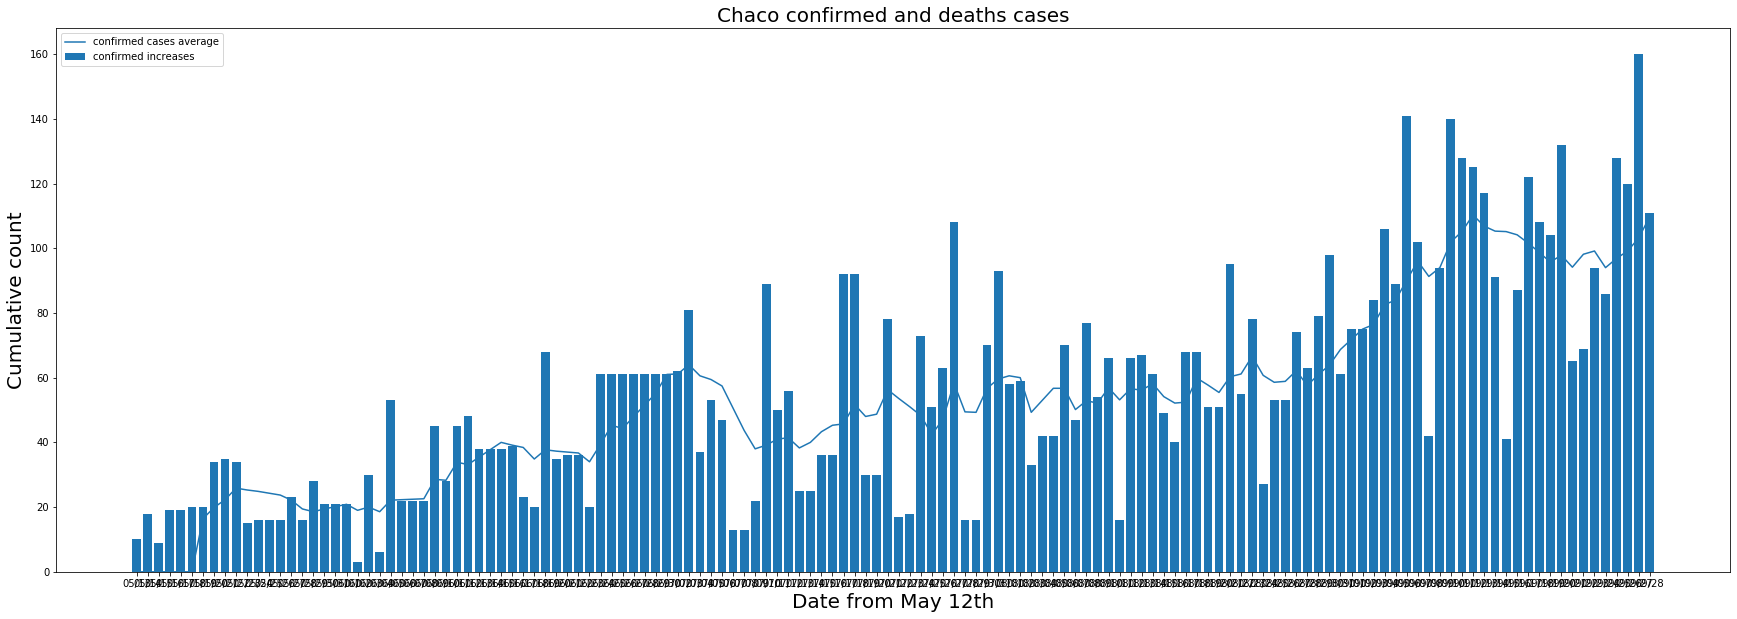

In [283]:

chaco_confirmed_ave = [] #store the 7 days average.
for i in range(6):
    n = 0
    chaco_confirmed_ave.append(n)

for i in range(len(chaco_confirmedChange)-6):
    temp_ave = (chaco_confirmedChange[i] + chaco_confirmedChange[i+1] + chaco_confirmedChange[i+2] + chaco_confirmedChange[i+3] + chaco_confirmedChange[i+4] + chaco_confirmedChange[i+5] + chaco_confirmedChange[i+6])/7
    chaco_confirmed_ave.append(temp_ave)

updated_ave = [] #change the dates range to start 7 days later.

for i in range(len(updated)-7):
    updated_ave.append(updated[i+6])

chaco_confirmedChange_7 = []#ignore the first 7 items

for i in range(len(chaco_confirmedChange)-7):
    chaco_confirmedChange_7.append(chaco_confirmedChange[i+6])

fig, cases = plt.subplots(figsize=(30, 10))
#cases.plot(updated, chaco_deaths, label="deaths cases")
cases.plot(updated, chaco_confirmed_ave, label="confirmed cases average")
cases.bar(updated, chaco_confirmedChange, label = "confirmed increases")
cases.legend()
cases.set_title("Chaco confirmed and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Cumulative count', fontsize=20)
#plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ChacoData.png')
#plt.legend(fontsize=16, loc='upper left') 

'''
fig, change = plt.subplots(figsize=(30, 10))
change.bar(updated, chaco_confirmedChange, label = "confirmed increases")
change.bar(updated, chaco_deathsChange, label = "deaths increases")
change.legend()
change.set_title("Chaco daily increase of confirmed and deaths cases", fontsize = 20)
plt.xlabel('Date from May 12th', fontsize=20)
plt.ylabel('Daily count', fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\ChacoDataBar.png')
plt.legend(fontsize=16, loc='upper left')
'''

In [284]:
countries_raw_file = open("DataFiles/Countries_raw_data.csv", "r")
#write a list for all country names
countries_raw_data = countries_raw_file.readline()
countries_raw_list = countries_raw_data.split(',')
countries = [] #list to store the contries names
countries_confirmed = [] #list to stored the confirmed cases
countries_confirmedChange = []
countries_deaths = []
countries_deathsChange = []
countries_recovered = []
countries_recoveredChange = []
countries_deathsPer = []
countries_recoveredPer = []
while countries_raw_data:
    countries_raw_data = countries_raw_file.readline()
    countries_raw_list = countries_raw_data.split(',')
    if countries_raw_list[0] != "":
        if updated[-1] in countries_raw_list[1]:
            countries_confirmed.append(countries_raw_list[2])
            countries_confirmedChange.append(countries_raw_list[3])
            countries_deaths.append(countries_raw_list[4])
            countries_deathsChange.append(countries_raw_list[5])
            countries_recovered.append(countries_raw_list[6])
            countries_recoveredChange.append(countries_raw_list[7])
            countries.append(countries_raw_list[12]) #to add a country name to the countries[] list
            if int(countries_raw_list[2]) == 0:
                countries_deathsPer.append(0)
            elif countries_raw_list[4] == '':
                countries_deathsPer.append(0)
            else:
                per_country_death = (int(countries_raw_list[4])/int(countries_raw_list[2]))*100 #calculate death percentage per country
                countries_deathsPer.append(round(per_country_death, 2)) #store thde death percentage

print(len(countries_recovered))
for index in range(len(countries_recovered)):
    if int(countries_confirmed[index]) == 0:
        countries_recoveredPer.append(0)
    elif countries_recovered[index] == '':
        countries_recoveredPer.append(0)
    else:
        per_country_recovered = (int(countries_recovered[index])/int(countries_confirmed[index]))*100 #calculage recovered percentage per country
        countries_recoveredPer.append(round(per_country_recovered, 2)) #stored the recovered percentage

# Sort the death percentage per country
countries_deathsPer_dict = dict(zip(countries, countries_deathsPer))
sorted_countries_deathsPer_dict = {key: value for key, value in sorted(countries_deathsPer_dict.items(), key=lambda item: item[1], reverse=True)}
print("List of countries by deaths percentages: \n")
n = 0
rankArg = 0
rankUSA = 0
rankWorldWide = 0
for x, y in sorted_countries_deathsPer_dict.items():
    print(x, y, end="  ")
    n += 1
    if n%10 == 0:
        print()
        print('Rank:', n+10)
    if x == "Argentina":
        rankArg = n + 1
    if x == "United States":
        rankUSA = n + 1
    if x == "Worldwide":
        rankWorldWide = n + 1
        
print("\nArgentina is ranked:", rankArg)
print("USA is ranked:", rankUSA)
print("Worldwide is ranked:", rankWorldWide)

# Sort recovered percentage per country
countries_recoveredPer_dict = dict(zip(countries, countries_recoveredPer))
sorted_countries_recoveredPer_dict = {key: value for key, value in sorted(countries_recoveredPer_dict.items(), key=lambda item: item[1], reverse=True)}
print()
print("List of countries by recovered percentages: \n")
n = 0
for x, y in sorted_countries_recoveredPer_dict.items():
    print(x, y)
    n += 1
    if n%10 == 0:
        print()
        print('Rank:', n+10)
    if x == "Argentina":
        rankArg = n + 1
    if x == "United States":
        rankUSA = n + 1
    if x == "Worldwide":
        rankWorldWide = n + 1

print("\nArgentina is ranked:", rankArg)
print("USA is ranked:", rankUSA)
print("Worldwide is ranked:", rankWorldWide)

# Calculate on the fly the death percentage: per_state_death = (int(ArgCountry_data_list[3])/int(ArgCountry_data_list[1]))*100
# rank them and only display the top 10...
# calculate the country with better recovery rate
# compare to a week earlier which conuntry is increasing the most

countries_raw_file.close()

213
List of countries by deaths percentages: 

Yemen 28.93  Italy 11.51  Mexico 10.44  United Kingdom 9.57  Belgium 8.74  Ecuador 8.36  Jersey 7.84  Montserrat 7.69  Chad 7.06  Isle of Man 7.06  
Rank: 20
Sweden 6.36  Fiji 6.25  Sudan 6.15  Liberia 6.13  Canada 5.97  Bolivia 5.88  France 5.86  Niger 5.78  San Marino 5.78  Egypt 5.73  
Rank: 30
Iran 5.73  Netherlands 5.57  China (mainland) 5.43  Ireland 5.09  Guernsey 5.08  Bermuda 4.97  Syria 4.73  Mali 4.24  Spain 4.2  North Macedonia 4.12  
Rank: 40
Kosovo 4.03  Peru 4.0  Bulgaria 3.97  Romania 3.83  Indonesia 3.76  Afghanistan 3.71  Barbados 3.68  Angola 3.66  Guatemala 3.58  Finland 3.46  
Rank: 50
Switzerland 3.43  Algeria 3.36  Germany 3.32  Northern Mariana Islands 3.28  Sierra Leone 3.25  Vietnam 3.25  Australia 3.24  Colombia 3.13  Malawi 3.11  The Gambia 3.09  
Rank: 60
Bosnia and Herzegovina 3.07  Antigua and Barbuda 3.06  Honduras 3.05  Hungary 3.03  Worldwide 3.01  Brazil 2.99  Nicaragua 2.94  Zimbabwe 2.92  El Salvador 2.

In [285]:
orders = {
    'cappuccino': 54,
    'latte': 56,
    'espresso': 72,
    'americano': 48,
    'cortado': 41
}

sort_orders = sorted(orders.items(), key=lambda x: x[1])

for i in sort_orders:
    print(i[0], i[1])

cortado 41
americano 48
cappuccino 54
latte 56
espresso 72


181


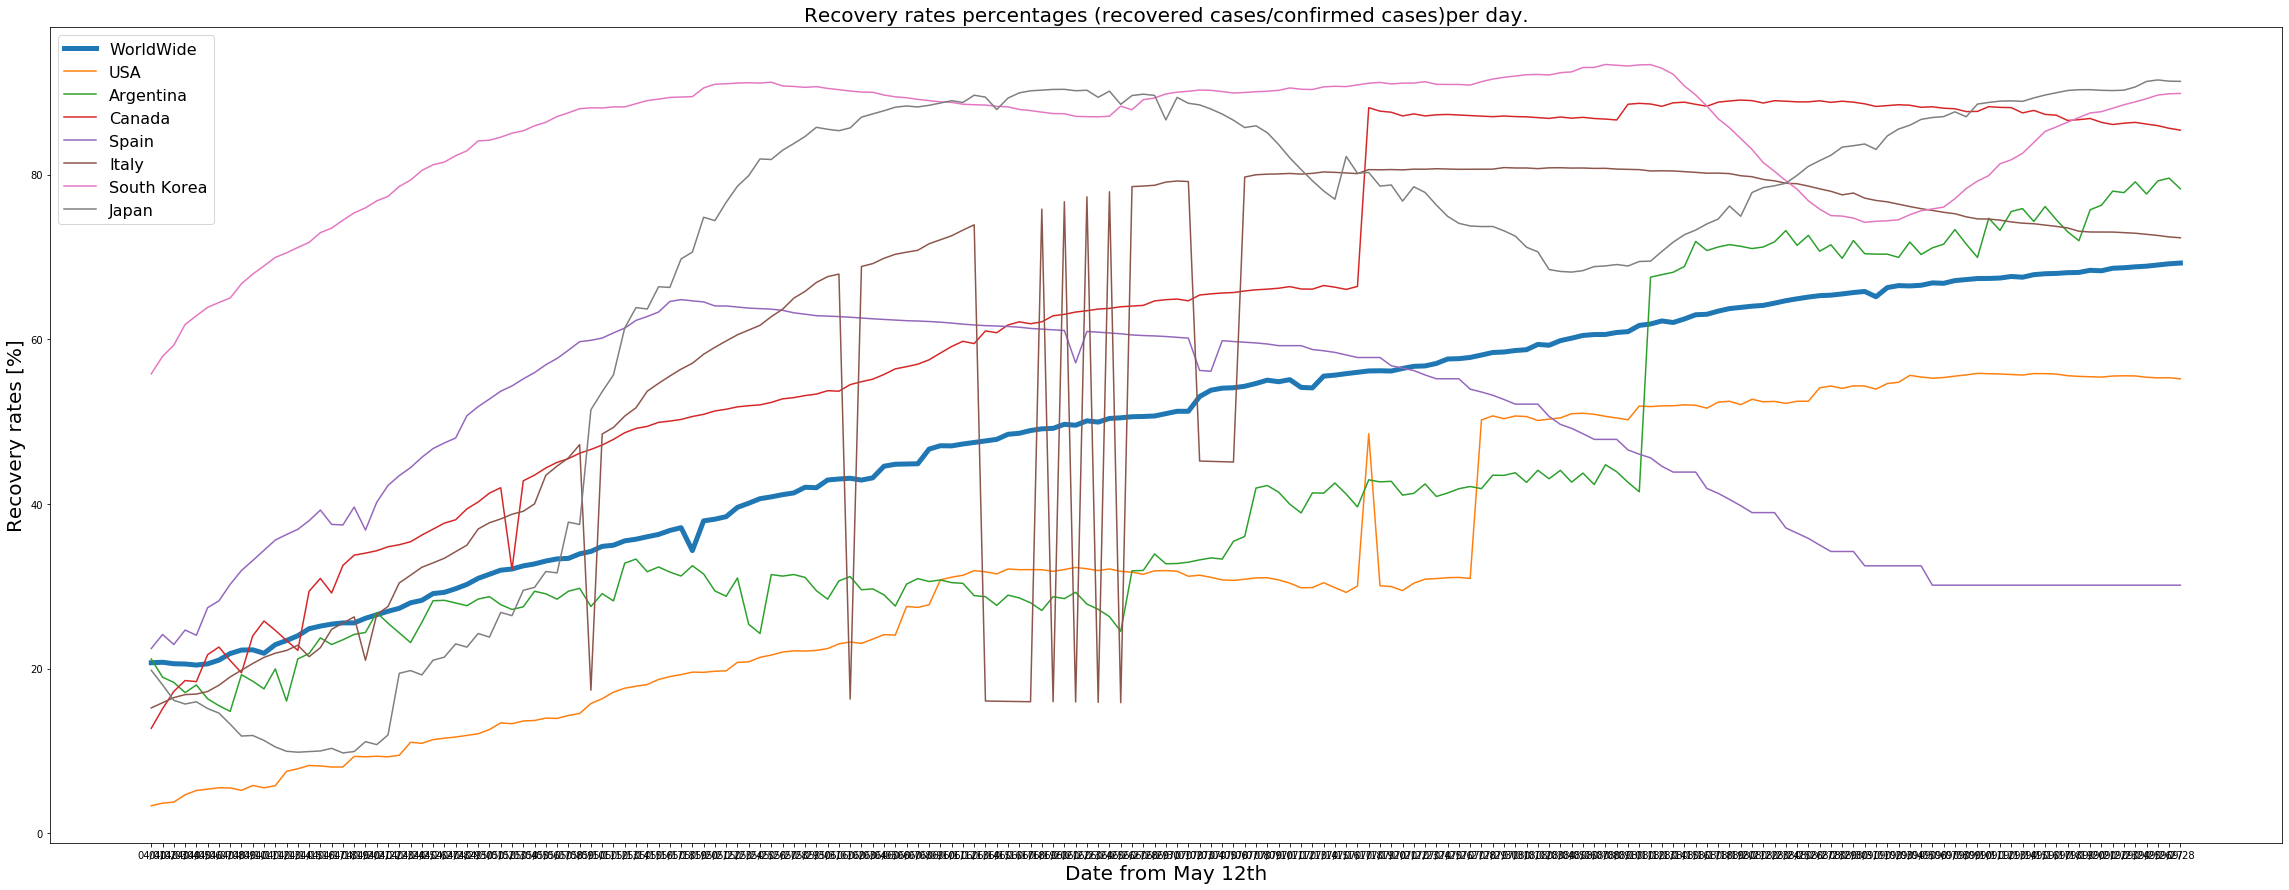

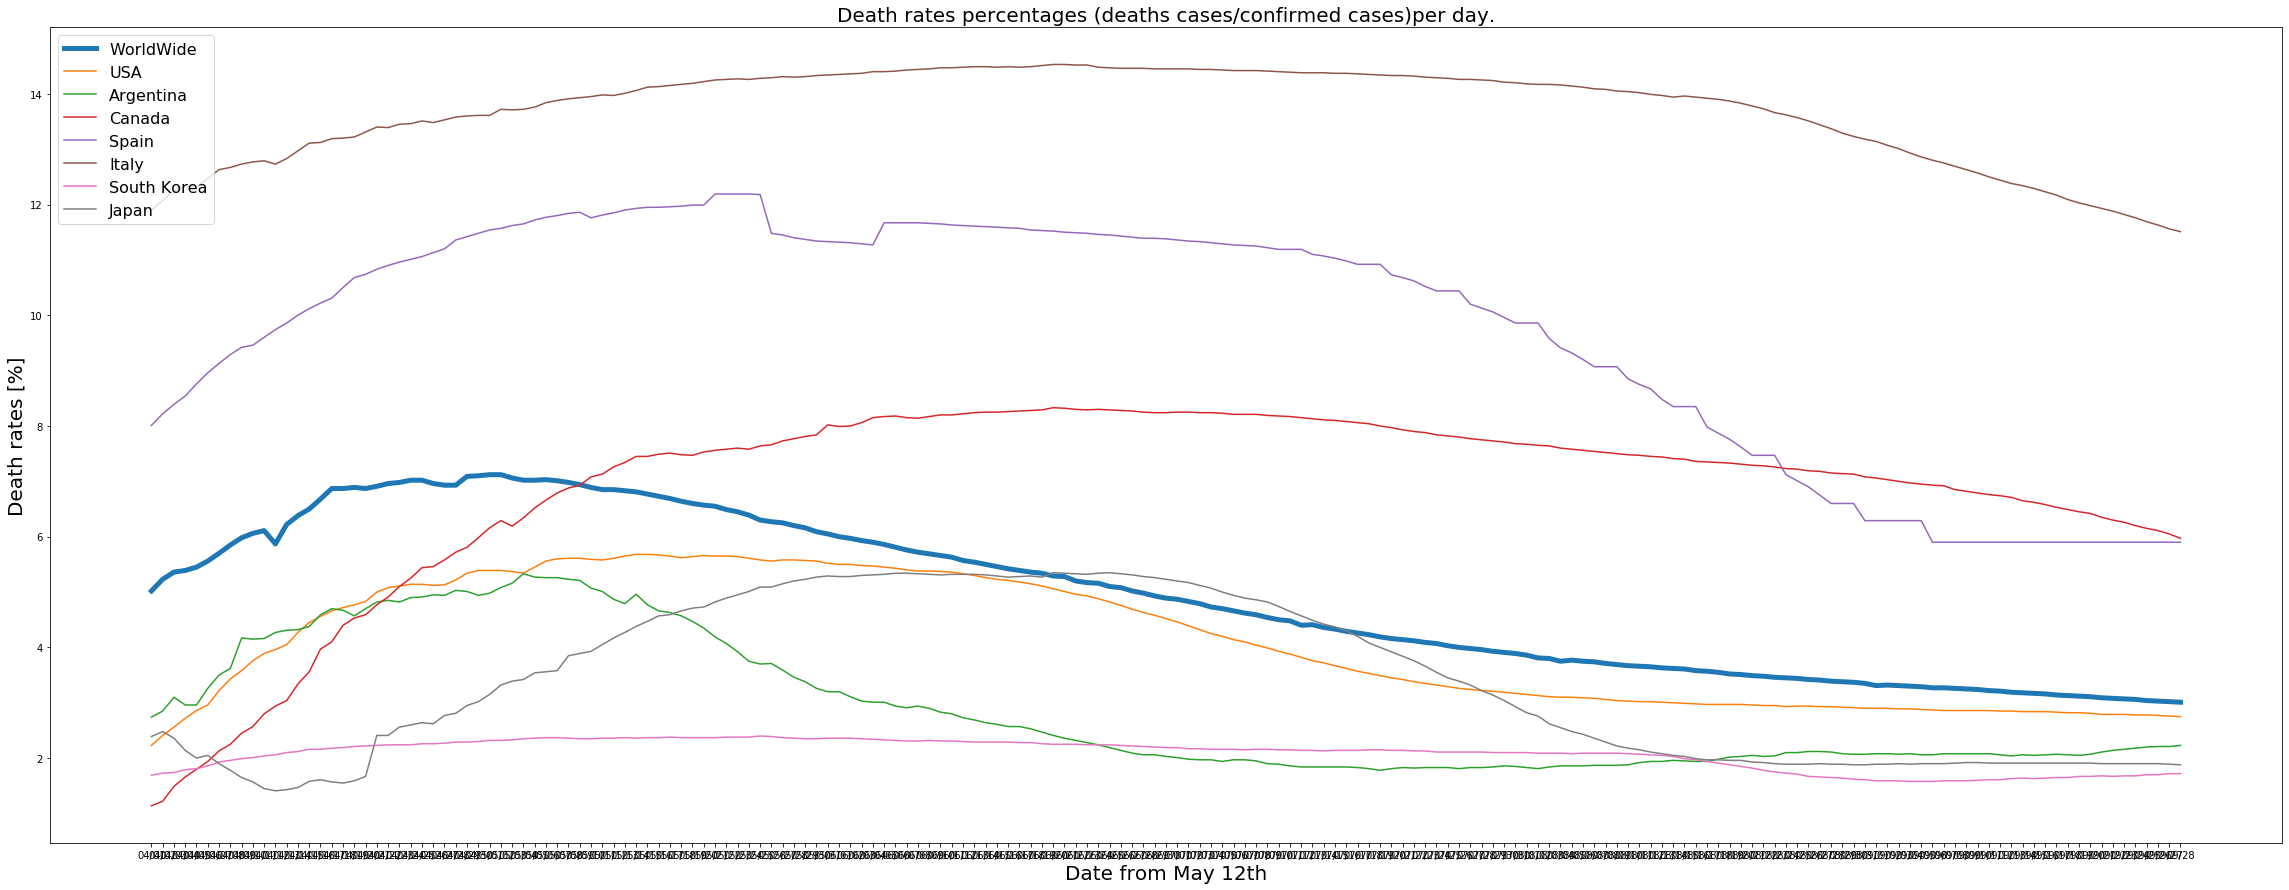

In [286]:
import matplotlib.pyplot as plt
import itertools
import warnings
from datetime import date

date_start = date(day = 1, month = 4, year = 2020) #this is the date we will use to start writing the graphs.

Countries_cal_file = open("DataFiles/Countries_cal_data.csv", 'r')
Countries_data = Countries_cal_file.readline()
Countries_data_list = Countries_data.split(',')

updated = [] #use the dates from Countries_cal_data.csv
WW_RecoveredPer = []
WW_deathsPer = []
USA_RecoveredPer = []
USA_deathsPer = []
Arg_RecoveredPer = []
Arg_deathsPer = []
Canada_RecoveredPer = []
Canada_deathsPer = []
Spain_RecoveredPer = []
Spain_deathsPer = []
Italy_RecoveredPer = []
Italy_deathsPer = []
SKorea_RecoveredPer = []
SKorea_deathsPer = []
Japan_RecoveredPer = []
Japan_deathsPer = []
#UK has incomplete data for recovered cases.

#add the chaco data in different lists to use then in the graphs 
while Countries_data:
    Countries_data = Countries_cal_file.readline()
    Countries_data_list = Countries_data.split(',')
    if Countries_data_list[0] != '':
        if Countries_data_list[9] == 'Worldwide\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                updated.append(date_temp.strftime('%m/%d'))
                WW_RecoveredPer.append(float(Countries_data_list[8]))
                WW_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'United States\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start: # or date_temp <= last_day:
                USA_RecoveredPer.append(float(Countries_data_list[8]))
                USA_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'Argentina\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                Arg_RecoveredPer.append(float(Countries_data_list[8]))
                Arg_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'Canada\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                Canada_RecoveredPer.append(float(Countries_data_list[8]))
                Canada_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'Spain\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                Spain_RecoveredPer.append(float(Countries_data_list[8]))
                Spain_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'Italy\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                Italy_RecoveredPer.append(float(Countries_data_list[8]))
                Italy_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'South Korea\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                SKorea_RecoveredPer.append(float(Countries_data_list[8]))
                SKorea_deathsPer.append(float(Countries_data_list[5]))
        elif Countries_data_list[9] == 'Japan\n':
            temp = Countries_data_list[0].split('/')
            date_temp = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
            if date_temp >= date_start:
                Japan_RecoveredPer.append(float(Countries_data_list[8]))
                Japan_deathsPer.append(float(Countries_data_list[5]))

#Code to make sure the list of dates has the same length to the rest of the lists
while len(USA_RecoveredPer) > len(updated):
    USA_RecoveredPer.pop()
while len(WW_RecoveredPer) > len(updated):
    WW_RecoveredPer.pop()
while len(Arg_RecoveredPer) > len(updated):
    Arg_RecoveredPer.pop()
while len(Canada_RecoveredPer) > len(updated):
    Canada_RecoveredPer.pop()
while len(Spain_RecoveredPer) > len(updated):
    Spain_RecoveredPer.pop()
while len(Italy_RecoveredPer) > len(updated):
    Italy_RecoveredPer.pop()
while len(SKorea_RecoveredPer) > len(updated):
    SKorea_RecoveredPer.pop()
while len(Japan_RecoveredPer) > len(updated):
    Japan_RecoveredPer.pop()

while len(USA_deathsPer) > len(updated):
    USA_deathsPer.pop()
while len(WW_deathsPer) > len(updated):
    WW_deathsPer.pop()
while len(Arg_deathsPer) > len(updated):
    Arg_deathsPer.pop()
while len(Canada_deathsPer) > len(updated):
    Canada_deathsPer.pop()
while len(Spain_deathsPer) > len(updated):
    Spain_deathsPer.pop()
while len(Italy_deathsPer) > len(updated):
    Italy_deathsPer.pop()
while len(SKorea_deathsPer) > len(updated):
    SKorea_deathsPer.pop()
while len(Japan_deathsPer) > len(updated):
    Japan_deathsPer.pop()
    
print(len(USA_RecoveredPer))

#print(WW_RecoveredPer)
fig, per = plt.subplots(figsize=(40, 15))
per.plot(updated, WW_RecoveredPer, linewidth=5, label = "WorldWide")
per.plot(updated, USA_RecoveredPer, label = "USA")
per.plot(updated, Arg_RecoveredPer, label = "Argentina")
per.plot(updated, Canada_RecoveredPer, label = "Canada")
per.plot(updated, Spain_RecoveredPer, label = "Spain")
per.plot(updated, Italy_RecoveredPer, label = "Italy")
per.plot(updated, SKorea_RecoveredPer, label = "South Korea")
per.plot(updated, Japan_RecoveredPer, label = "Japan")
plt.ylabel('Recovery rates [%]', fontsize=20)
plt.xlabel('Date from May 12th', fontsize=20)
per.legend()
per.set_title("Recovery rates percentages (recovered cases/confirmed cases)per day.", fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\RecoveredRatesCountries.png')
plt.legend(fontsize=16, loc='upper left')

fig, per = plt.subplots(figsize=(40, 15))
per.plot(updated, WW_deathsPer, linewidth=5, label = "WorldWide")
per.plot(updated, USA_deathsPer, label = "USA")
per.plot(updated, Arg_deathsPer, label = "Argentina")
per.plot(updated, Canada_deathsPer, label = "Canada")
per.plot(updated, Spain_deathsPer, label = "Spain")
per.plot(updated, Italy_deathsPer, label = "Italy")
per.plot(updated, SKorea_deathsPer, label = "South Korea")
per.plot(updated, Japan_deathsPer, label = "Japan")
plt.ylabel('Death rates [%]', fontsize=20)
plt.xlabel('Date from May 12th', fontsize=20)
per.legend()
per.set_title("Death rates percentages (deaths cases/confirmed cases)per day.", fontsize=20)
plt.savefig('C:\\Users\\paulo\\Documents\\Paulo\\Covid19_Data\\OfficialGraph\\DeathRatesCountries.png')
plt.legend(fontsize=16, loc='upper left')



plt.show()

Countries_cal_file.close()

In [287]:
from datetime import date

date2 = date(day = 23, month = 4, year = 2021)

temp = '2/10/2020'
temp = temp.split('/')
print(temp[0],temp[1],temp[2])

date_test = date(month = int(temp[0]), day = int(temp[1]), year=int(temp[2]))
print(date_test.strftime("%m/%d/%y"))

if date.today() > date_test:
    print('old')
if date.today() < date2:
    print('new')


2 10 2020
02/10/20
old
new


In [288]:
print(province)

['Buenos Aires', 'City of Buenos Aires', 'Santa Fe', 'Cordoba', 'Mendoza', 'Tucuman', 'Jujuy', 'Rio Negro', 'Salta', 'Neuquen', 'Chaco', 'Entre Rios', 'La Rioja', 'Chubut', 'Santiago del Estero', 'San Luis', 'Corrientes', 'San Juan', 'Catamarca', 'Formosa', 'Misiones']


In [289]:
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
#%matplotlib notebook
%matplotlib inline
provincia = ['Catamarca', 'CF', 'Chaco', 'Chubut', 'BA', 'Corrientes', 'Cordoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Misiones', 'Mendoza', 'Neuquen', 'Rio Negro', 'San Juan', 'Santiago del Estero', 'Santa Fe', 'San Luis', '"Tierra del Fuego', 'Tucuman']
values = [0, 9044, 1090, 21, 11428, 96, 465, 53, 0, 6, 64, 38, 101, 152, 478, 5, 22, 276, 11, 149, 49]

combined_dict = dict(zip(provincia,values))

province = list(newdic.keys())
province_confirmed = list(newdic.values())

fig, bar_Arg = plt.subplots(figsize=(30,10))
bar_Arg.bar(province, province_confirmed, label = "confirmed cases", width=0.8, bottom=None, align='center', tick_label = None)
bar_Arg.legend()
bar_Arg.set_title("Confirm cases by provinces")

labels = ['bar']
activated = [True]
axCheckButton = plt.axes([0.03, 0.4, 0.15, 0.15])
chxbox = CheckButtons(axCheckButton,labels,activated)

NameError: name 'newdic' is not defined

In [ ]:
#open file to store the 'Worldwide' data
worldwide_file = open("DataFiles/Worldwide_raw_data.csv", 'r')
WW_data = worldwide_file.readline()
WW_data_list = WW_data.split(',')

while WW_data:
    if WW_data != "\n":
        WW_data_list = WW_data.split(',')
    else:
        pass
    WW_data = worldwide_file.readline()
        
#percentage of death
per_death = (int(WW_data_list[4])/int(WW_data_list[2]))*100

#percentage of recovered
per_recovered = (int(WW_data_list[6])/int(WW_data_list[2]))*100
print('as of', WW_data_list[1], ":")
print("Death %\t", round(per_death, 2))
print("Recovered %\t", round(per_recovered, 2))

worldwide_file.close()

In [ ]:
# Define dates
from datetime import datetime
from datetime import timedelta

today = datetime.now()
yesterday = (today - timedelta(days=1))
before_yesterday = (today - timedelta(days=2))
b_b_yesterday = (today - timedelta(days=3))
today = today.strftime("%m/%d/%Y")
yesterday = yesterday.strftime("%m/%d/%Y")
before_yesterday = before_yesterday.strftime("%m/%d/%Y")
b_b_yesterday = b_b_yesterday.strftime("%m/%d/%Y")

#open file to store the 'usa' data
usa_file = open("DataFiles/Usa_raw_data.csv", 'r')
usa_data = usa_file.readline()
usa_data_list = usa_data.split(',')
state = 'Washington'
usa_data_state_latest = []
while usa_data:
    if usa_data != '\n':
        usa_data_list = usa_data.split(',')
        if usa_data_list[13] == '':
            if usa_data_list[1] == yesterday:
                usa_data_latest = usa_data_list
            else:
                pass
        elif usa_data_list[13] == state:
            #print(usa_data_list)
            if usa_data_list[14] == '\n':
                if usa_data_list[1] == before_yesterday:
                    usa_data_state_latest = usa_data_list
                else:
                    pass
            else:
                pass
    else:
        pass
    usa_data = usa_file.readline()
        
#percentage of death
per_death = (int(usa_data_latest[4])/int(usa_data_latest[2]))*100

#percentage of recovered
per_recovered = (int(usa_data_latest[6])/int(usa_data_latest[2]))*100
print('as of', usa_data_latest[1], ":")
print("Death %\t", per_death)
print("Recovered %\t", per_recovered)

#state calculation
#percentage of death
per_death = (int(usa_data_state_latest[4])/int(usa_data_state_latest[2]))*100

#percentage of recovered
#per_recovered = (int(usa_data_state_latest[6])/int(usa_data_state_latest[2]))*100
print("Data of", state)
print('as of', usa_data_state_latest[1], ":")
print("Death %\t", per_death)
#print("Recovered %\t", per_recovered)


usa_file.close()

In [ ]:
# Define dates
from datetime import datetime
from datetime import timedelta

today = datetime.now()
yesterday = (today - timedelta(days=1))
#yesterday = '05/31/2020'
before_yesterday = (today - timedelta(days=2))
#before_yesterday = '05/30/2020'
b_b_yesterday = (today - timedelta(days=3))
week_earlier = (today - timedelta(days=8))
today = today.strftime("%m/%d/%Y")
yesterday = yesterday.strftime("%m/%d/%Y")
before_yesterday = before_yesterday.strftime("%m/%d/%Y")
b_b_yesterday = b_b_yesterday.strftime("%m/%d/%Y")
week_earlier = week_earlier.strftime("%m/%d/%Y")

#open file to store the 'usa' data
arg_file = open("DataFiles/Argentina_raw_data.csv", 'r')
arg_data = arg_file.readline()
arg_data_list = arg_data.split(',')
state = 'Chaco'
arg_data_state_latest = []
while arg_data:
    if arg_data != '\n':
        arg_data_list = arg_data.split(',')
        if arg_data_list[13] == '':
            if arg_data_list[1] == yesterday:
                arg_data_latest = arg_data_list
            elif arg_data_list[1] == week_earlier:
                arg_data_week_ago = arg_data_list #Arg data from a week ago
            else:
                pass
        elif arg_data_list[13] == state:
            if arg_data_list[14] == '\n':
                if arg_data_list[1] == before_yesterday:
                    arg_data_state_latest = arg_data_list
                    print(arg_data_state_latest)
                elif arg_data_list[1] == week_earlier:
                    arg_data_state_week_ago = arg_data_list
                else:
                    pass
            else:
                pass
    else:
        pass
    arg_data = arg_file.readline()
        
#percentage of death
per_death = (int(arg_data_latest[4])/int(arg_data_latest[2]))*100

#percentage of recovered
per_recovered = (int(arg_data_latest[6])/int(arg_data_latest[2]))*100

#Delta cases looking at total infected
delta_cases = int(arg_data_latest[2]) - int(arg_data_week_ago[2])
delta_cases_per = (delta_cases/int(arg_data_latest[2]))*100

#Delta cases looking at total recovered
delta_recovered = int(arg_data_latest[6]) - int(arg_data_week_ago[6])
delta_recovered_per = (delta_recovered/int(arg_data_latest[6]))*100

#Delta cases looking at total deaths
delta_death = int(arg_data_latest[4]) - int(arg_data_week_ago[4])
delta_death_per = (delta_death/int(arg_data_latest[4]))*100

print('Argentina as of', arg_data_latest[1], ":")
print("Total cases:\t", arg_data_latest[2])
print("Total recovered:\t", arg_data_latest[6])
print("Total death:\t", arg_data_latest[4])
print("Recovered %\t", per_recovered)
print("Death %\t", per_death)
print()
print("----Delta from", arg_data_week_ago[1], "----")
print("Total cases:\t", delta_cases, "\t%",delta_cases_per)
print("Total recovered:\t", delta_recovered, "\t%", delta_recovered_per)
print("Total deaths:\t", delta_death, "\t%", delta_death_per)

#state calculation
#percentage of death
per_state_death = (int(arg_data_state_latest[4])/int(arg_data_state_latest[2]))*100

#Delta cases looking at total infected
delta_state_cases = int(arg_data_state_latest[2]) - int(arg_data_state_week_ago[2])
delta_state_cases_per = (delta_state_cases/int(arg_data_state_latest[2]))*100

#Delta cases looking at total deaths
delta_state_death = int(arg_data_state_latest[4]) - int(arg_data_state_week_ago[4])
delta_state_death_per = (delta_state_death/int(arg_data_state_latest[4]))*100

#percentage of recovered
#per_recovered = (int(arg_data_state_latest[6])/int(arg_data_state_latest[2]))*100
print()
print(state, 'as of', arg_data_state_latest[1], ":")
print("Total cases:\t", arg_data_state_latest[2])
print("Total death:\t", arg_data_state_latest[4])
print("Death %\t", per_state_death)
#print("Recovered %\t", per_recovered)
print()
print("----Delta from", arg_data_state_week_ago[1], "----")
print("Total cases:\t", delta_state_cases, "\t%",delta_state_cases_per)
print("Total deaths:\t", delta_state_death, "\t%", delta_state_death_per)

arg_file.close()

#Write to a file
#open file to store the 'Argentina' data
def chaco_sum():
    arg_sum_file = open("DataFiles/Argentina_summary.txt", 'a+')
    line1 = state + " as of " + arg_data_state_latest[1] + "\n"
    line2 = "Total cases:\t" + arg_data_state_latest[2] + "\n"
    line3 = "Total death:\t" + arg_data_state_latest[4] + "\n"
    line4 = "Death %\t" + str(per_state_death) + "\n"
    line5 = "----Delta from " + arg_data_state_week_ago[1] + "----\n"
    line6 = "Total cases:\t" + str(delta_state_cases) + "\t%" + str(delta_state_cases_per) + "\n"
    line7 = "Total deaths:\t" + str(delta_state_death) + "\t%" + str(delta_state_death_per) + "\n"
    arg_sum_file.write(line1)
    arg_sum_file.write(line2)
    arg_sum_file.write(line3)
    arg_sum_file.write(line4)
    arg_sum_file.write(line5)
    arg_sum_file.write(line6)
    arg_sum_file.write(line7)

    arg_sum_file.close()
    
#chaco_sum()

In [ ]:
#Define the index content:
#Updated: [1] Confirmed: [2] ConfirmedChange: [3] Deaths: [4] DeathsChange: [5] Recovered: [6] RecoveredChange: [7] Country_Region: [12]	AdminRegion1(state/province): [13] AdminRegion2 (county): [14]
#import datetime
from datetime import datetime
from datetime import timedelta
#import locale
#loc = locale.getlocale()  # get current locale
# use en_US locale; name might vary with platform
#locale.setlocale(locale.LC_TIME, 'en_US')
x = datetime.now()
print(x)
print(x.strftime("%m/%d/%Y"))
print(x.year)
print(x.strftime("%A"))

today = datetime.now()
yesterday = (today - timedelta(days=1))
before_yesterday = (today - timedelta(days=2))
b_b_yesterday = (today - timedelta(days=3))
today = today.strftime("%m/%d/%Y")
yesterday = yesterday.strftime("%m/%d/%Y")
before_yesterday = before_yesterday.strftime("%m/%d/%Y")
b_b_yesterday = b_b_yesterday.strftime("%m/%d/%Y")


print(today)
print(yesterday)
print(before_yesterday)
print(b_b_yesterday)

In [ ]:
#remove last line from a text line in python
fd=open("DataFiles/file.txt","r")
d=fd.read() #store all the file content in d
fd.close()
print('d:', d)
m=d.split("\n") #make the file content into a list m
print('m:', m)
s="\n".join(m[:-1]) #make a string and remove the last line
print('s:', s)
fd=open("DataFiles/file.txt","w+")
for i in range(len(s)):
    fd.write(s[i])
fd.close()

In [ ]:
from datetime import datetime
from datetime import timedelta
today = datetime.today()
yesterday = today - timedelta(days=1)
print(today)
print()
print(yesterday)